In [13]:
import sys
import os

current_dir = os.path.dirname(os.path.abspath("__file__"))
parent_dir = os.path.abspath(os.path.join(current_dir, ".."))
sys.path.append(parent_dir)

In [14]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from graph_pkg.core import GraphTools
from graph_pkg.algorithms import dfs, bfs, find_shortest_path, find_all_paths, detect_cycles
from graph_pkg.statistics import compute_degree_matrix, compute_laplacian, compute_eigens, compute_local_overlap
from graph_pkg.clustering import spectral_clustering

In [15]:
G_nx = nx.karate_club_graph()

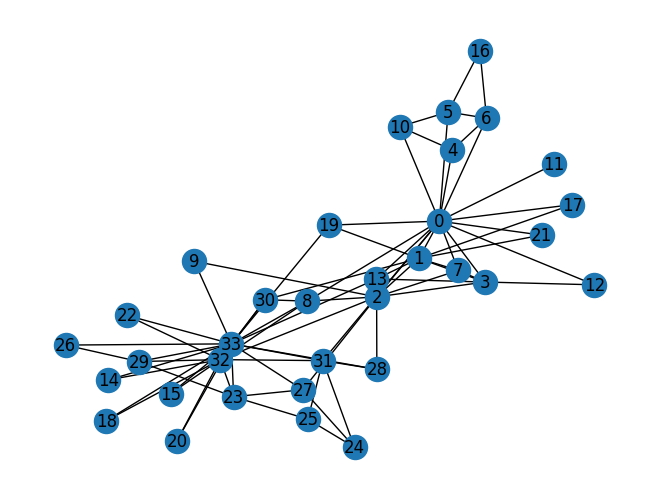

In [16]:
pos = nx.spring_layout(G_nx)
nx.draw(G_nx, pos, with_labels=True)
plt.show()

edge_list = list(G_nx.edges())
adjacency_matrix = nx.to_numpy_array(G_nx)
graph_el = GraphTools(edge_list=edge_list)
graph_am = GraphTools(adjacency_matrix=adjacency_matrix)

In [17]:
dfs_order = dfs(graph_el.G, start=0)
bfs_order = bfs(graph_el.G, start=0)
print("DFS:", dfs_order)
print("BFS:", bfs_order)

shortest_path = find_shortest_path(graph_el.G, source=3, target=22)
print("Shortest path between 3 and 22:", shortest_path)

DFS: [0, 1, 2, 3, 7, 12, 13, 33, 8, 30, 32, 14, 15, 18, 20, 22, 23, 25, 24, 27, 31, 28, 29, 26, 9, 19, 17, 21, 4, 6, 5, 10, 16, 11]
BFS: [0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 17, 19, 21, 31, 30, 9, 27, 28, 32, 16, 33, 24, 25, 23, 14, 15, 18, 20, 22, 29, 26]
Shortest path between 3 and 22: [3, 2, 32, 22]


In [18]:
all_paths_length_3 = find_all_paths(graph_el.G, source=3, target=22, path_length=3)
print("All paths of length 3 between 3 and 22:", all_paths_length_3)

cycles = detect_cycles(graph_am.G)
print("Detected cycles:", cycles)

All paths of length 3 between 3 and 22: [[3, 2, 32, 22], [3, 13, 33, 22]]
Detected cycles: [[8, 32, 33], [14, 32, 33], [15, 32, 33], [18, 32, 33], [20, 32, 33], [22, 32, 33], [23, 32, 33], [29, 32, 33], [30, 32, 33], [31, 32, 33], [8, 2, 32], [9, 2, 32, 33], [13, 2, 32, 33], [27, 2, 32, 33], [28, 2, 32, 33], [0, 7, 2], [1, 7, 2], [3, 7, 2], [0, 3, 2], [1, 3, 2], [13, 3, 2], [0, 12, 3], [0, 1, 2], [13, 1, 2], [19, 1, 2, 32, 33], [30, 1, 2, 32], [0, 21, 1], [0, 17, 1], [8, 0, 2], [13, 0, 2], [19, 0, 2, 32, 33], [31, 0, 2, 32], [4, 10, 0], [5, 10, 0], [4, 6, 0], [5, 6, 0], [5, 16, 6], [28, 31, 33], [23, 25, 31, 33], [24, 25, 31], [27, 24, 31, 33], [8, 30, 33], [23, 29, 33], [26, 29, 33], [23, 27, 33]]


In [19]:
D = compute_degree_matrix(graph_am.G)
overlap = compute_local_overlap(graph_am.G)
L = compute_laplacian(graph_am.G)

print("Matrix of degrees D:\n", D)
print("\nLocal overlap measures:", overlap)
print("\nLaplacian:\n", L)

Matrix of degrees D:
 [[16  0  0 ...  0  0  0]
 [ 0  9  0 ...  0  0  0]
 [ 0  0 10 ...  0  0  0]
 ...
 [ 0  0  0 ...  6  0  0]
 [ 0  0  0 ...  0 12  0]
 [ 0  0  0 ...  0  0 17]]

Local overlap measures: {(0, 1): 7, (0, 2): 5, (0, 3): 5, (0, 4): 2, (0, 5): 2, (0, 6): 2, (0, 7): 3, (0, 8): 1, (0, 10): 2, (0, 11): 0, (0, 12): 1, (0, 13): 3, (0, 17): 1, (0, 19): 1, (0, 21): 1, (0, 31): 0, (1, 2): 4, (1, 3): 4, (1, 7): 3, (1, 13): 3, (1, 17): 1, (1, 19): 1, (1, 21): 1, (1, 30): 0, (2, 3): 4, (2, 7): 3, (2, 8): 2, (2, 9): 0, (2, 13): 3, (2, 27): 0, (2, 28): 0, (2, 32): 1, (3, 7): 3, (3, 12): 1, (3, 13): 3, (4, 6): 1, (4, 10): 1, (5, 6): 2, (5, 10): 1, (5, 16): 1, (6, 16): 1, (8, 30): 2, (8, 32): 3, (8, 33): 2, (9, 33): 0, (13, 33): 0, (14, 32): 1, (14, 33): 1, (15, 32): 1, (15, 33): 1, (18, 32): 1, (18, 33): 1, (19, 33): 0, (20, 32): 1, (20, 33): 1, (22, 32): 1, (22, 33): 1, (23, 25): 0, (23, 27): 1, (23, 29): 2, (23, 32): 2, (23, 33): 3, (24, 25): 1, (24, 27): 0, (24, 31): 1, (25, 31): 1, (

In [20]:
eigenvalues_adj, eigenvectors_adj = compute_eigens(graph_am.G, matrix_type='adjacency')

print("Eigenvalues of adjacency matrix:\n", eigenvalues_adj)
print("\nEigenvectors of adjacency matrix:\n", eigenvectors_adj)

Eigenvalues of adjacency matrix:
 [ 2.16875659e+01+0.00000000e+00j  1.71063201e+01+0.00000000e+00j
 -1.33449133e+01+0.00000000e+00j  9.64919417e+00+0.00000000e+00j
 -1.10396022e+01+0.00000000e+00j  7.82997687e+00+0.00000000e+00j
 -8.71566123e+00+0.00000000e+00j -7.79851507e+00+0.00000000e+00j
 -7.04557187e+00+0.00000000e+00j -6.66114004e+00+0.00000000e+00j
  4.63796702e+00+0.00000000e+00j -5.39013571e+00+0.00000000e+00j
 -4.60877622e+00+0.00000000e+00j -4.20706023e+00+0.00000000e+00j
  3.67239314e+00+0.00000000e+00j -2.56459972e+00+0.00000000e+00j
 -2.63046781e+00+0.00000000e+00j  3.00810189e+00+0.00000000e+00j
 -1.36223551e+00+0.00000000e+00j -1.15788606e+00+0.00000000e+00j
  2.60733871e+00+0.00000000e+00j  2.14145845e+00+0.00000000e+00j
  1.84325656e+00+0.00000000e+00j  1.19949546e+00+0.00000000e+00j
  8.79588769e-01+0.00000000e+00j  3.51432024e-01+0.00000000e+00j
 -8.75240463e-02+0.00000000e+00j -4.20410930e-16+0.00000000e+00j
 -7.48900428e-16+0.00000000e+00j  1.96133125e-16+0.00000

In [21]:
eigenvalues_L, eigenvectors_L = compute_eigens(graph_am.G, matrix_type='laplacian')

print("Eigenvalues of laplacian matrix:\n", eigenvalues_L)
print("\nEigenvectors of laplacian matrix:\n", eigenvectors_L)

Eigenvalues of laplacian matrix:
 [5.20653410e+01 4.59907681e+01 4.18328632e+01 3.79927558e+01
 2.96883840e+01 2.55555039e+01 2.27849630e+01 2.13586504e+01
 1.93238240e+01 1.70337951e+01 1.48885752e+01 1.43813508e+01
 1.20754027e+01 1.18744202e+01 5.80146093e-15 1.02218147e+01
 1.00106981e+01 9.18096651e+00 1.18710730e+00 6.97788032e+00
 6.44605541e+00 5.59481244e+00 2.39431926e+00 5.16855490e+00
 4.97817925e+00 4.69727550e+00 4.54469763e+00 4.16160574e+00
 3.70606484e+00 3.80094429e+00 2.93182048e+00 2.96830180e+00
 3.12126310e+00 3.06104079e+00]

Eigenvectors of laplacian matrix:
 [[-0.04112292  0.89148386  0.28195376 ...  0.00638615  0.00914715
  -0.00145275]
 [-0.00213939 -0.06001719 -0.14191848 ... -0.0301143   0.05240857
  -0.01099092]
 [-0.06957341 -0.32339704  0.10768374 ...  0.00725526  0.04202807
  -0.01445087]
 ...
 [ 0.09929394 -0.11904664  0.19594468 ... -0.00718397 -0.03189686
  -0.08814423]
 [ 0.22331175  0.21662519 -0.8411156  ... -0.01602632 -0.01686481
  -0.03820932]


Labels: [0 0 0 0 3 3 3 0 1 1 3 0 0 0 1 1 3 0 1 0 1 0 1 2 2 2 1 2 1 1 1 2 1 1]


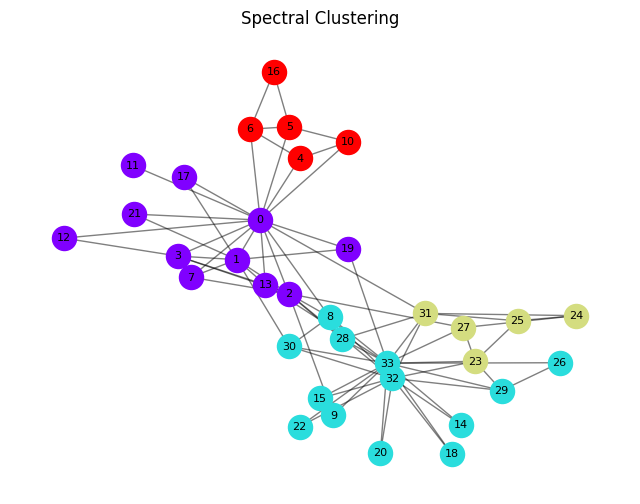

In [22]:
labels = spectral_clustering(graph_am.G, clusters_num=4, normalized=True)
print("Labels:", labels)

pos = nx.spring_layout(graph_am.G, seed=42)
unique_labels = np.unique(labels)

colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))
plt.figure(figsize=(8, 6))
node_label_map = dict(zip(graph_am.G.nodes(), labels))

for cluster_label, color in zip(unique_labels, colors):
    cluster_nodes = [node for node, lbl in node_label_map.items() if lbl == cluster_label]
    
    nx.draw_networkx_nodes(
        graph_am.G,
        pos,
        nodelist=cluster_nodes,
        node_color=[color],    
        label=f"Cluster {cluster_label}",
        node_size=300
    )

nx.draw_networkx_edges(graph_am.G, pos, alpha=0.5)
nx.draw_networkx_labels(graph_am.G, pos, font_size=8)

plt.axis("off")
plt.title("Spectral Clustering")
plt.show()